# 5.2 案例实战：员工离职预测模型搭建

**5.2.1 模型搭建**

1.数据读取与预处理

首先读取员工信息以及其交易离职表现，即是否离职记录，代码如下：

In [1]:
import pandas as pd
df = pd.read_excel('员工离职预测模型.xlsx')
df.head()

,工资,满意度,考核得分,工程数量,月工时,工龄,离职
0,低,3.8,0.53,2,157,3,1
1,中,8.0,0.86,5,262,6,1
2,中,1.1,0.88,7,272,4,1
3,低,7.2,0.87,5,223,5,1
4,低,3.7,0.52,2,159,3,1


处理文本内容，代码如下：

In [2]:
df = df.replace({'工资': {'低': 0, '中': 1, '高': 2}})
df.head()

,工资,满意度,考核得分,工程数量,月工时,工龄,离职
0,0,3.8,0.53,2,157,3,1
1,1,8.0,0.86,5,262,6,1
2,1,1.1,0.88,7,272,4,1
3,0,7.2,0.87,5,223,5,1
4,0,3.7,0.52,2,159,3,1


2.提取特征变量和目标变量

In [3]:
X = df.drop(columns='离职') 
y = df['离职']

3.划分训练集和测试集

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

4.模型训练及搭建

In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=123) 
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

上述模型搭建代码汇总

In [6]:
# 1.读取数据与简单预处理
import pandas as pd
df = pd.read_excel('员工离职预测模型.xlsx')
df = df.replace({'工资': {'低': 0, '中': 1, '高': 2}})

# 2.提取特征变量和目标变量
X = df.drop(columns='离职') 
y = df['离职']   

# 3.划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 4.模型训练及搭建
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=123)
model.fit(X_train, y_train)    

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**5.2.2 模型预测及评估**

**1.直接预测是否离职**

In [6]:
y_pred = model.predict(X_test)
print(y_pred[0:100])

[0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0]


In [7]:
# 通过构造DataFrame进行对比
a = pd.DataFrame()  # 创建一个空DataFrame 
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)
a.head()

,预测值,实际值
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


In [8]:
# 如果要查看整体的预测准确度，可以采用如下代码：
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.9573333333333334


In [9]:
# 或者用模型自带的score函数查看预测准确度
model.score(X_test, y_test)

0.9573333333333334

**2.预测不离职&离职概率**

其实分类决策树模型本质预测的并不是准确的0或1的分类，而是预测其属于某一分类的概率，可以通过如下代码查看预测属于各个分类的概率：

In [10]:
y_pred_proba = model.predict_proba(X_test)
print(y_pred_proba[0:5])

[[0.98526077 0.01473923]
 [0.98526077 0.01473923]
 [0.28600613 0.71399387]
 [0.98526077 0.01473923]
 [0.92283214 0.07716786]]


In [11]:
b = pd.DataFrame(y_pred_proba, columns=['不离职概率', '离职概率']) 
b.head()

,不离职概率,离职概率
0,0.985261,0.014739
1,0.985261,0.014739
2,0.286006,0.713994
3,0.985261,0.014739
4,0.922832,0.077168


如果想查看离职概率，即查看y_pred_proba的第二列，可以采用如下代码，这个是二维数组选取列的方法，其中逗号前的“:”表示所有行，逗号后面的数字1则表示第二列，如果把数字1改成数字0，则提取第一列不离职概率。

In [13]:
y_pred_proba[:,1]

array([0.01473923, 0.01473923, 0.71399387, ..., 0.01473923, 0.94594595,
       0.01473923])

**3.模型预测效果评估**

在Python实现上，通过4.3节讲过的代码就可以求出在不同阈值下的命中率（TPR）以及假警报率（FPR）的值，从而可以绘制ROC曲线。

In [14]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:,1])

通过4.3节相关代码可以查看不同阈值下的假警报率和命中率，代码如下：

In [15]:
a = pd.DataFrame()  # 创建一个空DataFrame 
a['阈值'] = list(thres)
a['假警报率'] = list(fpr)
a['命中率'] = list(tpr)
a

,阈值,假警报率,命中率
0,2.000000,0.000000,0.000000
1,1.000000,0.000000,0.247110
2,0.945946,0.008232,0.677746
3,0.713994,0.038128,0.942197
4,0.077168,0.159879,0.969653
5,0.059406,0.171577,0.972543
6,0.045763,0.240035,0.976879
7,0.014739,1.000000,1.000000


已知了不同阈值下的假警报率和命中率，可通过matplotlib库可绘制ROC曲线，代码如下：

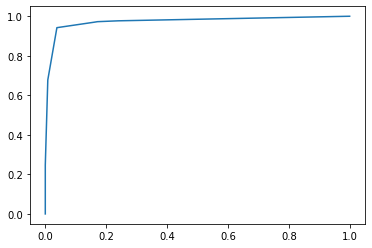

In [24]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

通过如下代码则可以快速求出模型的AUC值：

In [17]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred_proba[:,1])
print(score)

0.9736722483245008


**4.特征重要性评估**

In [18]:
model.feature_importances_

array([0.        , 0.59810862, 0.14007392, 0.10638659, 0.00456495,
       0.15086592])

In [19]:
# 通过DataFrame进行展示，并根据重要性进行倒序排列
features = X.columns  # 获取特征名称
importances = model.feature_importances_  # 获取特征重要性

# 通过二维表格形式显示
importances_df = pd.DataFrame()
importances_df['特征名称'] = features
importances_df['特征重要性'] = importances
importances_df.sort_values('特征重要性', ascending=False)

,特征名称,特征重要性
1,满意度,0.598109
5,工龄,0.150866
2,考核得分,0.140074
3,工程数量,0.106387
4,月工时,0.004565
0,工资,0.000000


**5.2.3 决策树模型可视化呈现及决策树要点理解**

通过graphviz插件进行决策树可视化，graphviz插件的更详细的使用教程可以查看该文档:https://shimo.im/docs/Dcgw8H6WxgWrc8hq/ 

In [20]:
# 1.如果不用显示中文，那么通过如下代码即可：
# !pip3 install pygraphviz
from sklearn.tree import export_graphviz
import graphviz
import os  # 以下这两行是手动进行环境变量配置，防止在本机环境的变量部署失败
os.environ['PATH'] = os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

dot_data = export_graphviz(model, out_file=None, class_names=['0', '1'])
graph = graphviz.Source(dot_data)

graph.render("result")  # 导出成PDF文件
print('可视化文件result.pdf已经保存在代码所在文件夹！')

可视化文件result.pdf已经保存在代码所在文件夹！


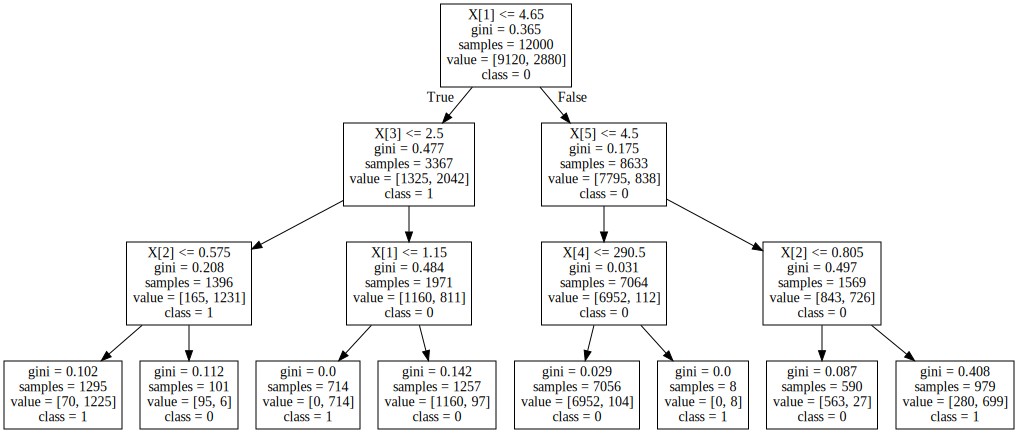

In [21]:
graph  # 在Jupyter Notebook中可以直接输入变量名查看可视化图片

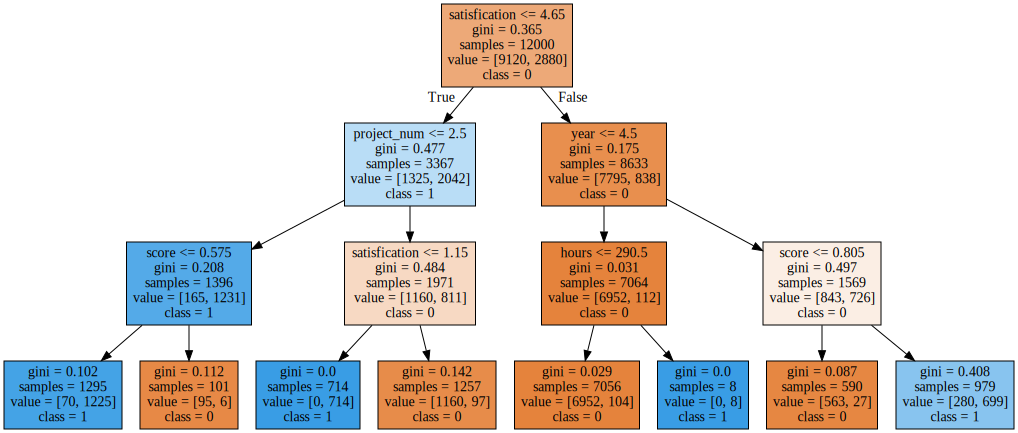

In [22]:
# 添加名称（feature_names）和填充颜色（filled=True）
dot_data = export_graphviz(model, out_file=None, feature_names=['income', 'satisfication', 'score', 'project_num', 'hours', 'year'], class_names=['0', '1'], filled=True)  
graph = graphviz.Source(dot_data)

graph

In [12]:
# 2.如果想显示中文，需要使用如下代码
from sklearn.tree import export_graphviz
import graphviz
import os  # 以下这两行是手动进行环境变量配置，防止在本机环境的变量部署失败
os.environ['PATH'] = os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

# 生成dot_data
dot_data = export_graphviz(model, out_file=None, feature_names=X_train.columns, class_names=['不离职', '离职'], rounded=True, filled=True)

# 将生成的dot_data内容导入到txt文件中
f = open('dot_data.txt', 'w')
f.write(dot_data)
f.close()

# 修改字体设置，避免中文乱码！
import re
f_old = open('dot_data.txt', 'r')
f_new = open('dot_data_new.txt', 'w', encoding='utf-8')
for line in f_old:
    if 'fontname' in line:
        font_re = 'fontname=(.*?)]'
        old_font = re.findall(font_re, line)[0]
        line = line.replace(old_font, 'SimHei')
    f_new.write(line)
f_old.close()
f_new.close()

# 以PNG的图片形式存储生成的可视化文件
os.system('dot -Tpng dot_data_new.txt -o 决策树模型.png')  
print('决策树模型.png已经保存在代码所在文件夹！')

# 以PDF的形式存储生成的可视化文件
os.system('dot -Tpdf dot_data_new.txt -o 决策树模型.pdf')  
print('决策树模型.pdf已经保存在代码所在文件夹！')

决策树模型.png已经保存在代码所在文件夹！
决策树模型.pdf已经保存在代码所在文件夹！


此时可以在代码所在文件夹中查看生成的可视化文件